I will be looking at the amount of playgrounds in each neighborhood. Our overall metric is the health/fitness level of people in each neighborhood, so I am looking at the amount of playgrounds as if children are outside in such environments doing some sort of exercise more often, they typically are healthier. Also, usually, the more playgrounds per neighboorhood, the easier it is for kids to go to them, so in theory, the more playgrounds a neighborhood has, the healthier those children should be.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
pg=pd.read_csv("playgrounds.tsv", sep='\t')

In [8]:
pg.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


In [16]:
pg.loc[:,'neighborhood']
#dataframe organized by neighborhood

0                Beechview
1         Crawford-Roberts
2        Central Northside
3                Beechview
4        Bedford Dwellings
              ...         
120                Carrick
121    Upper Lawrenceville
122            Beltzhoover
123           East Liberty
124         East Allegheny
Name: neighborhood, Length: 125, dtype: object

In [25]:
print(pg['neighborhood'].unique())
len(pg['neighborhood'].unique())
#amount of unique neighborhoods

['Beechview' 'Crawford-Roberts' 'Central Northside' 'Bedford Dwellings'
 'South Side Slopes' 'South Side Flats' 'Lower Lawrenceville' 'Banksville'
 'Homewood North' 'Bon Air' 'Central Oakland' 'Brighton Heights'
 'Brookline' 'Hazelwood' 'Squirrel Hill South' 'Spring Garden'
 'Lincoln-Lemington-Belmar' 'Windgap' 'Troy Hill' 'Westwood' 'Perry South'
 'Homewood West' 'Allegheny Center' 'Strip District' 'Stanton Heights'
 'Crafton Heights' 'West Oakland' 'East Carnegie' 'Duquesne Heights'
 'East Liberty' 'Esplen' 'Fairywood' 'Highland Park' 'Upper Lawrenceville'
 'Fineview' 'Regent Square' 'Garfield' 'Greenfield' 'South Oakland'
 'Allentown' 'Hays' 'Elliott' 'Morningside' 'Terrace Village' 'Larimer'
 'Carrick' 'Central Lawrenceville' 'Lincoln Place' 'Manchester'
 'Marshall-Shadeland' 'Sheraden' 'Beltzhoover' 'Shadyside'
 'Mount Washington' 'Oakwood' 'Bloomfield' 'Perry North' 'Upper Hill'
 'New Homestead' 'Spring Hill-City View' 'Swisshelm Park' 'Bluff'
 'Middle Hill' 'West End' 'Polish Hi

68

In [107]:
word = (pg.neighborhood)
di = dict()
for w in word:
    if w not in di:
        di[w] = 1
    else:
        di[w] += 1
print(di)
#lists the amount of parks in each neighborhood

{'Beechview': 5, 'Crawford-Roberts': 3, 'Central Northside': 2, 'Bedford Dwellings': 1, 'South Side Slopes': 5, 'South Side Flats': 2, 'Lower Lawrenceville': 1, 'Banksville': 1, 'Homewood North': 1, 'Bon Air': 1, 'Central Oakland': 1, 'Brighton Heights': 2, 'Brookline': 2, 'Hazelwood': 3, 'Squirrel Hill South': 8, 'Spring Garden': 1, 'Lincoln-Lemington-Belmar': 2, 'Windgap': 1, 'Troy Hill': 2, 'Westwood': 1, 'Perry South': 1, 'Homewood West': 1, 'Allegheny Center': 4, 'Strip District': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'West Oakland': 1, 'East Carnegie': 1, 'Duquesne Heights': 1, 'East Liberty': 3, 'Esplen': 1, 'Fairywood': 1, 'Highland Park': 4, 'Upper Lawrenceville': 3, 'Fineview': 1, 'Regent Square': 1, 'Garfield': 2, 'Greenfield': 2, 'South Oakland': 3, 'Allentown': 1, 'Hays': 1, 'Elliott': 3, 'Morningside': 2, 'Terrace Village': 1, 'Larimer': 1, 'Carrick': 3, 'Central Lawrenceville': 1, 'Lincoln Place': 2, 'Manchester': 2, 'Marshall-Shadeland': 2, 'Sheraden': 4, 'Belt

In [108]:
p=pg.groupby("neighborhood").count()
p
#new dataframe organized by amount of parks per neighborhood

,id,name,type,maintenance_responsibility,park,street,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,
Allegheny Center,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4
Allentown,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Banksville,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Bedford Dwellings,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Beechview,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,3,3,0,2,3,3,2,3,3,3,3,3,3,3,3,3
West End,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
West Oakland,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text major ticklabel objects>)

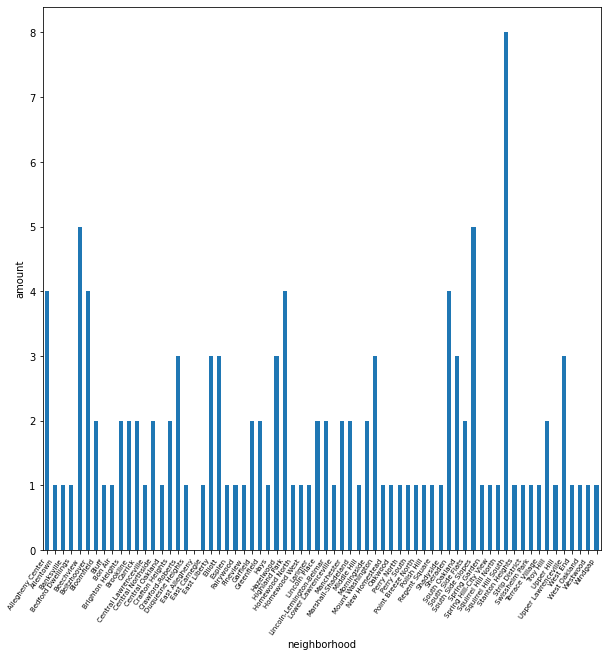

In [95]:
p['park'].plot.bar(figsize=(10,10))
plt.ylabel("amount")
plt.xticks(ha='right', rotation=55, fontsize=7)

#amount per neighborhood as bar graph, not that nice to look at tho

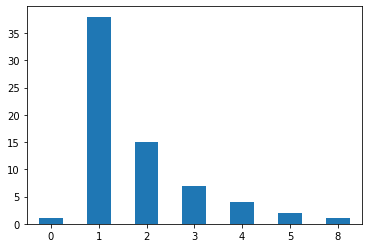

In [59]:
p["park"].value_counts().sort_index().plot(kind='bar', rot=0)
#amount of neighborhoods that have certain amount of parks, interesting to see

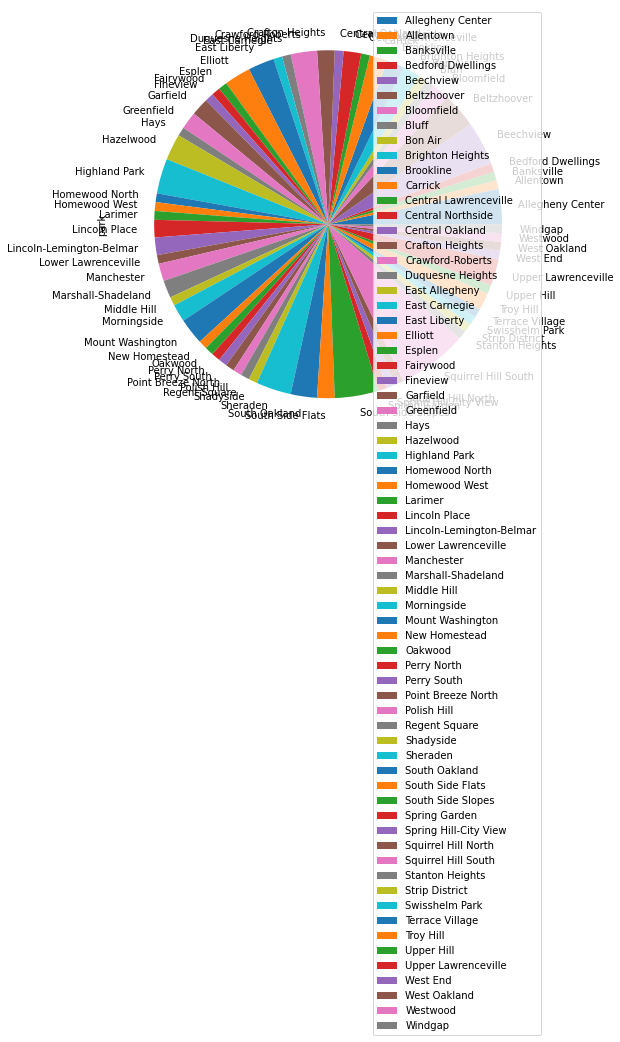

In [51]:
p[["park"]].plot.pie(y='park', subplots=False, figsize=(8, 8))
#a bit better than the bar graph, but still fairly ugly

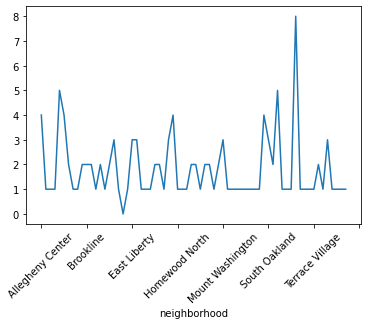

In [106]:
p['park'].plot(rot=45)
#doesn't provide a good analyisis, but nicer to look at than other two

So, by this initial analysis, I can conclude that the neighborhood with the most parks is Squirrel Hill North with 8 parks. Thus, by the metric described earlier, this would be the healthiest neighborhood by this dataset. The two neighborhoods after that would be Beechview and South Side Slopes with 5 parks.